In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
model = load_model(r"/home/gokul/Projects/Face-Emotion-Recognition-CNN/artifacts/face_emotion_model.h5")

I0000 00:00:1758471546.307164   39461 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [5]:
val_dir = r"/home/gokul/Projects/Face-Emotion-Recognition-CNN/data/test"
datagen = ImageDataGenerator(rescale=1./255)
val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [6]:
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

/home/gokul/ml/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-09-21 16:19:13.590555: I external/local_xla/xla/service/service.cc:163] XLA service 0x75ead800bb40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-21 16:19:13.590618: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-09-21 16:19:13.624434: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-21 16:19:13.784334: I external/local_xla/xla/stream_executor/cuda/cuda_dnn

  5/113 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step

I0000 00:00:1758471556.823634   39666 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step


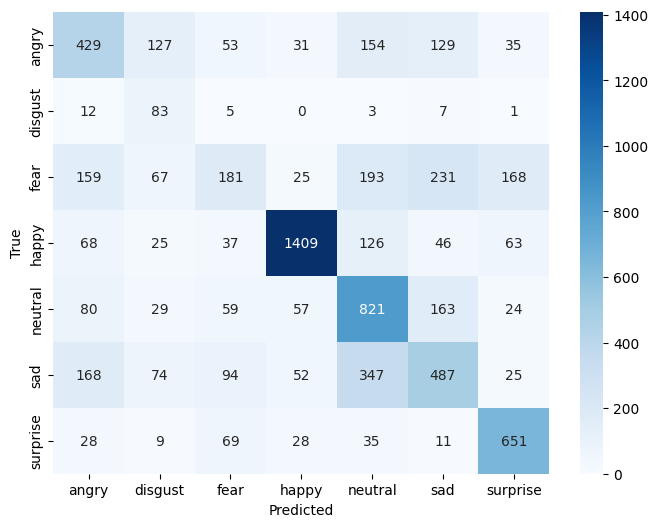

In [7]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [8]:
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

              precision    recall  f1-score   support

       angry       0.45      0.45      0.45       958
     disgust       0.20      0.75      0.32       111
        fear       0.36      0.18      0.24      1024
       happy       0.88      0.79      0.83      1774
     neutral       0.49      0.67      0.56      1233
         sad       0.45      0.39      0.42      1247
    surprise       0.67      0.78      0.72       831

    accuracy                           0.57      7178
   macro avg       0.50      0.57      0.51      7178
weighted avg       0.57      0.57      0.56      7178

